In [1]:
# Step 1: Load libraries and dataset
import pandas as pd
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Show first 5 rows
df.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# Check data types and structure
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [3]:
# Summary statistics for numerical columns
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Average measurements per species
grouped = df.groupby('species').mean()
grouped


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


Matplotlib is building the font cache; this may take a moment.


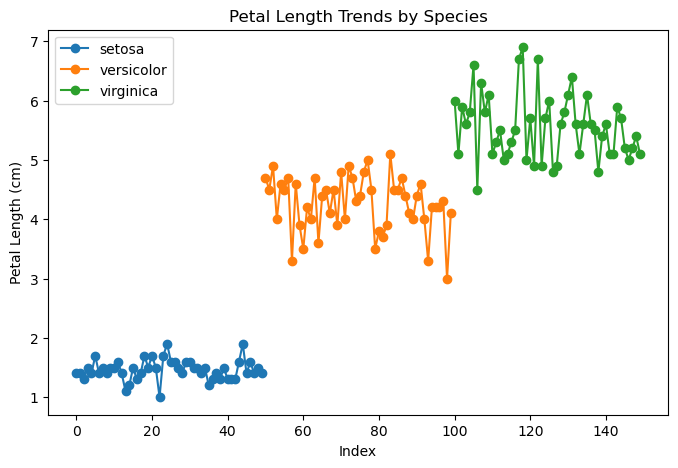

In [5]:
import matplotlib.pyplot as plt

# Line chart of petal length for each species
plt.figure(figsize=(8,5))

for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.plot(subset.index, subset['petal length (cm)'], marker='o', label=species)

plt.title("Petal Length Trends by Species")
plt.xlabel("Index")
plt.ylabel("Petal Length (cm)")
plt.legend()
plt.show()


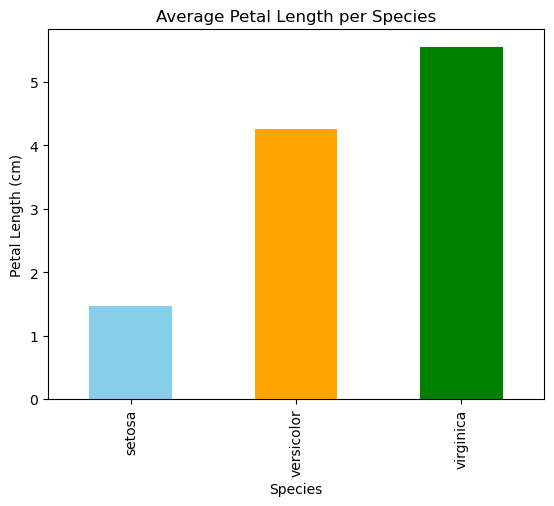

In [6]:
# Bar chart using the grouped data
grouped['petal length (cm)'].plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title("Average Petal Length per Species")
plt.ylabel("Petal Length (cm)")
plt.xlabel("Species")
plt.show()


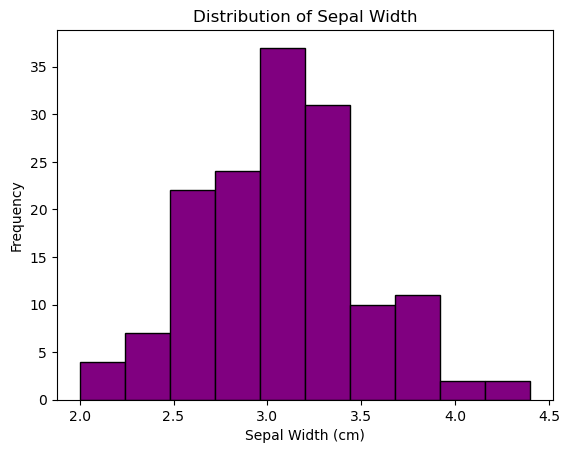

In [7]:
# Histogram of sepal width
plt.hist(df['sepal width (cm)'], bins=10, color='purple', edgecolor='black')
plt.title("Distribution of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.show()


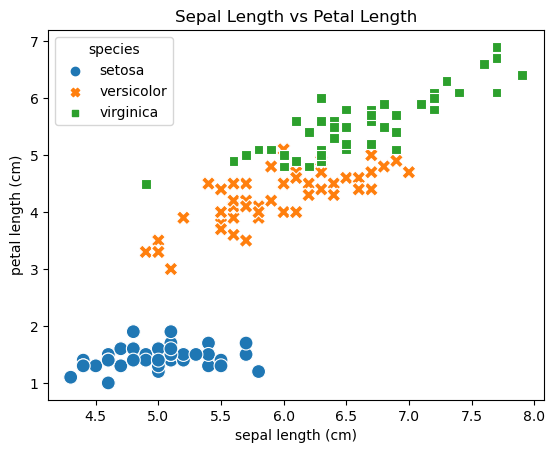

In [8]:
import seaborn as sns

# Scatter plot colored by species
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species', style='species', s=100)
plt.title("Sepal Length vs Petal Length")
plt.show()


# 📊 Observations and Conclusions

### 🔎 Observations

1. **Species Differences**  
   - *Setosa* has the smallest sepal and petal measurements.
   - *Virginica* has the largest petals on average.
   - *Versicolor* is in-between the two in terms of size.

2. **Distribution Patterns**  
   - Sepal width mostly falls between 2.5 cm and 4.0 cm.
   - Petal length shows clear separation — *Setosa* has very short petals compared to the other two species.

3. **Relationships Between Features**  
   - There is a positive relationship between **sepal length** and **petal length**.
   - Scatter plots show that the three species form distinct clusters.

4. **Trends**  
   - Line charts show that values for each species stay within a consistent range — confirming the dataset is well-separated.

---

### ✅ Conclusion

- The Iris dataset shows **clear, measurable differences** between the three species.  
- Using **pandas** made it easy to summarize and group data.  
- **Matplotlib** and **Seaborn** helped us visualize patterns that are not obvious in raw numbers.  
- These findings could be used to build a simple classifier to predict species based on measurements.
